In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_excel(r'C:\Users\DELL\Documents\car_dataset.xlsx')
df.head()

,Unnamed: 0,Brand,Model,Variant,Transmission,Manufacturing Year,Driven Kilometers,Owners,Fuel,Price
0,0,KIA,SELTOS,GTX + AT PETROL,Automatic,2020,"8,241 km",1st Owner,Petrol,"₹18,95,199"
1,1,Maruti,Swift,LXI,Manual,2019,"27,659 km",1st Owner,Petrol,"₹5,33,399"
2,2,Mercedes,Benz C Class,C 200 AVANTGARDE,Automatic,2014,"37,531 km",1st Owner,Petrol,"₹20,33,499"
3,3,MG,ASTOR,SHARP (O) 1.5 CVT IVORY,AUTOMATIC,2022,"2,091 km",1st Owner,Petrol,"₹17,67,999"
4,4,Tata,ALTROZ,XM+ 1.2,RTN,2021,"7,416 km",1st Owner,Petrol,"₹7,20,176"


From here we observe that Unnamed: 0 is index type of column, it is no use for ML Model Building purpose

In [4]:
# Precise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5660 non-null   int64 
 1   Brand               5660 non-null   object
 2   Model               5660 non-null   object
 3   Variant             5660 non-null   object
 4   Transmission        5660 non-null   object
 5   Manufacturing Year  5660 non-null   int64 
 6   Driven Kilometers   5660 non-null   object
 7   Owners              5660 non-null   object
 8   Fuel                5660 non-null   object
 9   Price               5660 non-null   object
dtypes: int64(2), object(8)
memory usage: 442.3+ KB


In [5]:
# Dropping column Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace= True)
df.shape      #checking the dimension

(5660, 9)

We can observe the dataset consist of 9 columns and 5660 rows. All of these columns contain important piece of information, so need to do some featutre engineering in order to convert these categorical columns to numerical.

The data is collected from car24.com are the location I choose is Delhi/NCR. That is the reason I don't add location column as data is collected from one location only. And at the end we will drop that column in order to build ML model.
One more thing, our dataset consist of every type of car including SUV, Sedans, Coupe, minivan, Hatchback.


It can also be observe that we don't have any Null values in our dataset, so we are good to move ahead with Feature engineering , EDA, encoding etc.

We observe that owner and driven kilometer are columns with meaningful numerical values, their datatype is object because character std are attached to them, we can remove those and make it numerical column again, without loosing any meaningful info.

Let's check on unique values in our dataset, this helps us to get an insight.

In [6]:
df.nunique()

Brand                  18
Model                  70
Variant               152
Transmission            8
Manufacturing Year     14
Driven Kilometers     269
Owners                  3
Fuel                    3
Price                 264
dtype: int64

We use nunique() in order to get the value count of unique elements present in the dataset. We can see that total number of 18 brands present in here.
High number of model is because we are including every type of car in our dataset. Now, let's go ahead with Feature Engineering and EDA.



# Feature Engineering & EDA

In [7]:
# Driven Kilometers column
df['Driven Kilometers']=df['Driven Kilometers'].apply(lambda x:x.split(' ')[0])
df['Driven Kilometers'].head()

0     8,241
1    27,659
2    37,531
3     2,091
4     7,416
Name: Driven Kilometers, dtype: object

In [11]:
for i in range(len(df['Driven Kilometers'])):
    df['Driven Kilometer'][i]= float(df['Driven Kilometers'][i].replace(',',''))
df['Driven Kilometer']

0        8241.0
1       27659.0
2       37531.0
3        2091.0
4        7416.0
         ...   
5655    19919.0
5656    25068.0
5657    69575.0
5658      649.0
5659    16179.0
Name: Driven Kilometer, Length: 5660, dtype: float64

In [12]:
df['Driven Kilometers']=df['Driven Kilometer'].astype(int)

We have converted Driven Kilometers column into numerical column, with all viable information inplace.

In [13]:
df['Owners'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [14]:
# mapping owners column
df['Owners']=df['Owners'].map({'1st Owner': 1, '2nd Owner':2, '3rd Owner': 3})
df['Owners'].dtype                     # checking the data type 

dtype('int64')

Now our Owners column is proper integer type, with all the valid information intact in it.

In [15]:
# Analyzing  Transmission column
df['Transmission'].unique()

array(['Automatic', 'Manual', 'AUTOMATIC', 'RTN', 'MT', 'DCT', '1.2',
       'SHVS'], dtype=object)

We can observe that Automatic and AUTOMATIC is same thing, let's keep it as one. And for rest RTN, MT, DCT, 1.2, SHVS, will replace them with manual only, as they are part of variant. We also know that transmission are basically are of two type only, Automatic and Manual.

In [16]:
df['Transmission'].replace('AUTOMATIC', 'Automatic', inplace=True)
df['Transmission'].replace('RTN', 'Manual', inplace=True)
df['Transmission'].replace('MT', 'Manual', inplace = True)
df['Transmission'].replace('DCT', 'Manual', inplace= True)
df['Transmission'].replace('1.2', 'Manual', inplace =True)
df['Transmission'].replace('SHVS','Manual', inplace= True)
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

Now, our Transmission column is also properly intact, we are having two valid option in it (Automatic/Manual)

In [17]:
# Let's check brand columns
df['Brand'].value_counts()

Maruti        2300
Hyundai        980
Honda          540
Ford           300
Tata           260
Mahindra       260
Renault        200
KIA            160
MG             160
Toyota          80
Audi            80
Jeep            80
BMW             60
Volkswagen      60
Skoda           40
Mercedes        40
Datsun          40
Nissan          20
Name: Brand, dtype: int64

We can observe that each brand is unique, and nothing is repeated. We can also observe that Maruti is highest registered brand for car sale.

In [18]:
# Analyzing Price column, as it is also object type, we need to convert it into numerical column.
df['Price']=df['Price'].apply(lambda x : x.split('₹')[1])

In [19]:
for i in range(len(df['Price'])):
    df['Price'][i]= float(df['Price'][i].replace(',',''))
df['Price']

0       1895199.0
1        533399.0
2       2033499.0
3       1767999.0
4        720176.0
          ...    
5655     566799.0
5656     398999.0
5657     381299.0
5658     731399.0
5659     431599.0
Name: Price, Length: 5660, dtype: object

In [20]:
# converting datatype to integer
df['Price']= df['Price'].astype(int)

In [21]:
# Let's chcek datatype of all the columns
df.dtypes

Brand                  object
Model                  object
Variant                object
Transmission           object
Manufacturing Year      int64
Driven Kilometers       int32
Owners                  int64
Fuel                   object
Price                   int32
Driven Kilometer      float64
dtype: object

In [22]:
# drop Driven Kilometer
df.drop(columns=['Driven Kilometer'], axis=1, inplace=True)
df.shape

(5660, 9)

Now everything looks good and in shape, before moving ahead with encoding, let's do some visualization

In [22]:
# separting categorical columns and continuous columns.
#Since categorical column has object datatype we will print all of the object data types and their unique values.
cat_df=[]
conti_df=[]
for column in df.columns:
    if df[column].dtype == object:    #checking datatype for each column if it is 'object'
        print(str(column) + ' : ' + str(df[column].unique()))   #unique() gives all the unique value of that column 
        print(df[column].value_counts())  # value_counts() count the number belongs to different class in that column
        print("\n _________________________________________________________________\n")
        cat_df.append(df[column])
        
    else:
        conti_df.append(df[column])
print("\n length of categorical column : ", len(cat_df))
print("\n length of continuous column : ", len(conti_df))

Brand : ['KIA' 'Maruti' 'Mercedes' 'MG' 'Tata' 'Nissan' 'Hyundai' 'Renault' 'Jeep'
 'Datsun' 'Mahindra' 'Honda' 'Volkswagen' 'Toyota' 'Ford' 'Skoda' 'Audi'
 'BMW']
Maruti        2300
Hyundai        980
Honda          540
Ford           300
Tata           260
Mahindra       260
Renault        200
KIA            160
MG             160
Toyota          80
Audi            80
Jeep            80
BMW             60
Volkswagen      60
Skoda           40
Mercedes        40
Datsun          40
Nissan          20
Name: Brand, dtype: int64

 _________________________________________________________________

Model : ['SELTOS' 'Swift' 'Benz C Class' 'ASTOR' 'ALTROZ' 'Dzire' 'Baleno'
 'MAGNITE' 'i10' 'Kiger' 'Alto 800' 'HECTOR PLUS' 'Compass' 'Redi Go'
 'Elite i20' 'Celerio' 'XUV 3OO' 'Duster' 'Creta' 'IGNIS' 'Tiago' 'Amaze'
 'Ritz' 'City' 'Harrier' 'Alto K10' 'Polo' 'Wagon R 1.0' 'URBAN CRUISER'
 'New Wagon-R' 'Corolla Altis' 'Ciaz' 'Grand i10' 'Thar' 'S PRESSO' 'Jazz'
 'NEW SANTRO' 'Vitara Brezza' 'X

From here we can observe that the categorical columns basically are of nominal type, so when we encode them we can use label encoder, as cardinality is very high here, and we don't want to increase number of columns in our Model.

Let's start with Univariate Analysis.

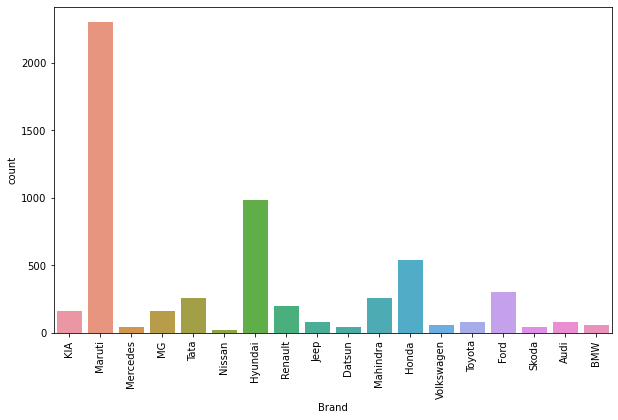

In [23]:
# For categorical data we usually plot count plot, as it gives us clear idea about distibution of categorical data.
plt.figure(figsize=(10,6))
sns.countplot(df['Brand'])
plt.xticks(rotation=90)
plt.show()

From above observation Maruti has highest number of cars to sale. while Nissan has lowest.

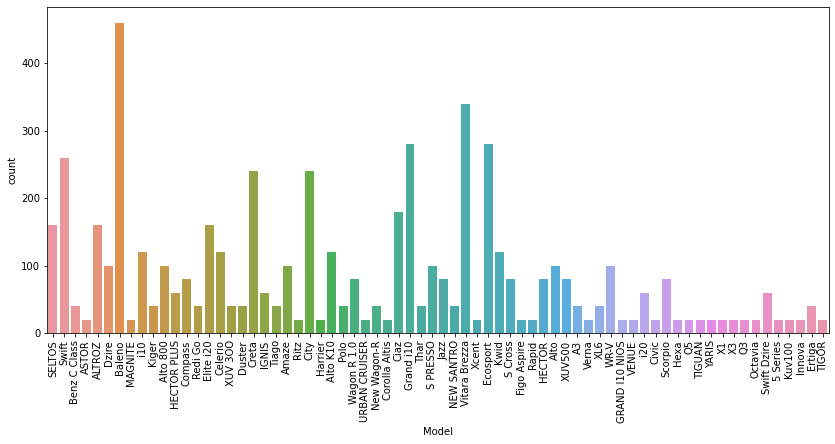

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(df['Model'])
plt.xticks(rotation=90)
plt.show()

From above observation Baleno model is the highest sales model followed by Vitara Brezza.

<AxesSubplot:xlabel='Transmission', ylabel='count'>

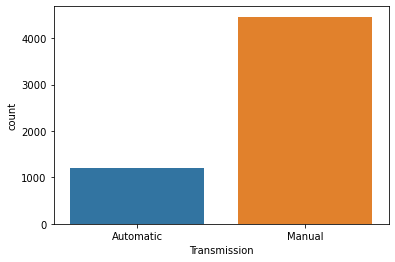

In [25]:
sns.countplot(df['Transmission'])

We can observe that in Indian market, manual cars are more than that of automatic cars.

<AxesSubplot:xlabel='Fuel', ylabel='count'>

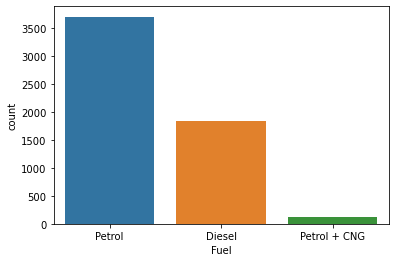

In [26]:
sns.countplot(df['Fuel'])

We can observe that most number of cars for sale has Petrol as fuel, while very few has Petrol+CNG as fuel source.

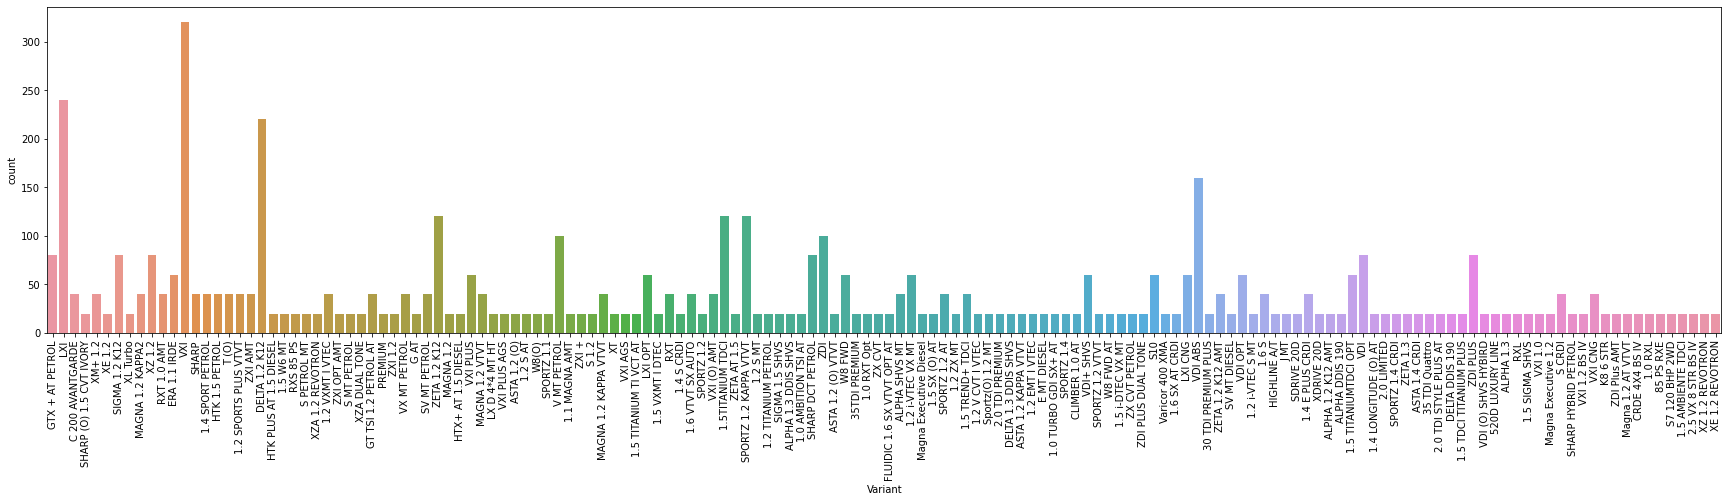

In [27]:
plt.figure(figsize=(30,6))
sns.countplot(df['Variant'])
plt.xticks(rotation=90)
plt.show()

We can clearly see the distribution of data about variant for various models of car.

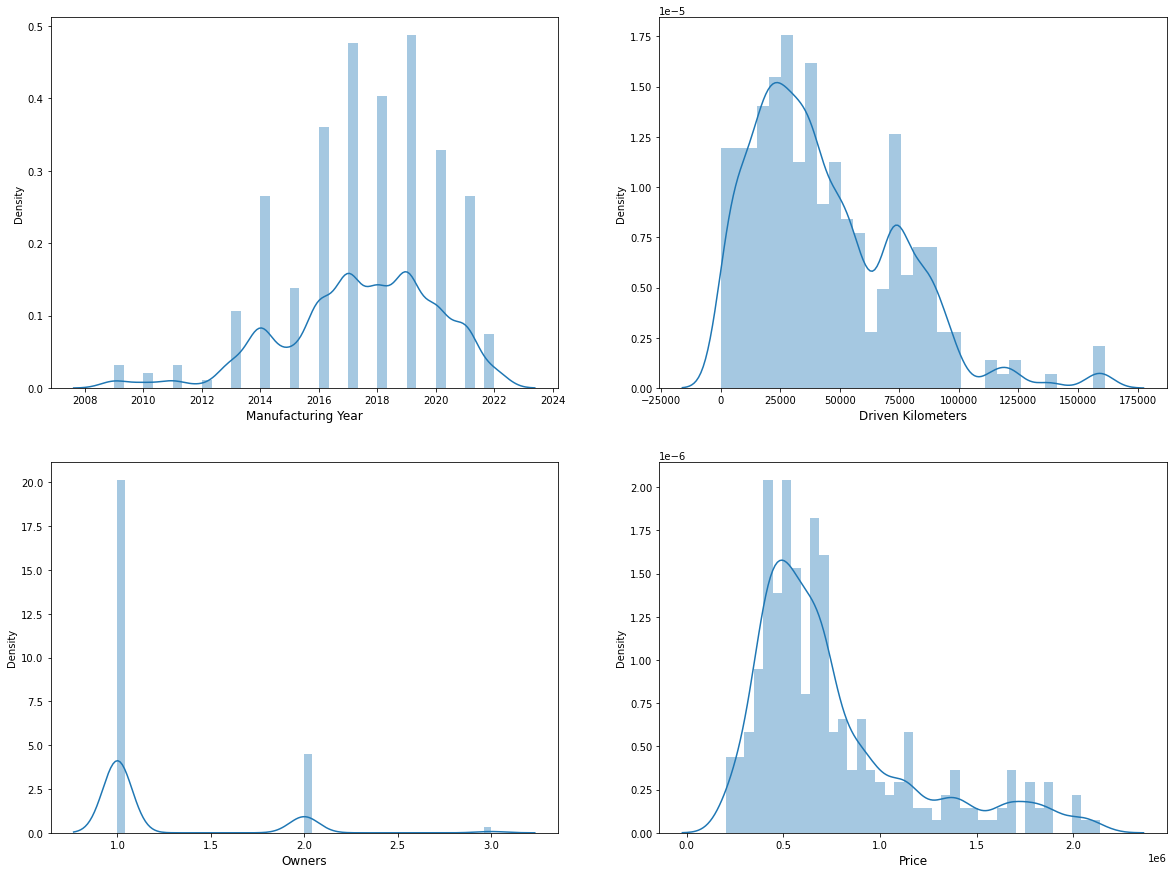

In [28]:
# Let's see distribution of continuous data
conti_feature= ['Manufacturing Year','Driven Kilometers','Owners','Price']
plt.figure(figsize=(20,15))
graph=1
for column in df[conti_feature]:
    if graph<=4:      #4 denotes total number of columns
        plt.subplot(2,2,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

From above observation we can sense that Manufacturing year and Owners are discrete columns, having discrete values. In case of owner number of single owner cars are more while we have least number of 3rd owner car.

Similarly we observe that cars with manufacturing year 2019 are highest in number, the dataset very less number of cars which are older than 2012.

Driven Kilometers and Price are continuous columns, we can see clear bell shape curve in the distibution pattern.


Let's starts with Multivariate Analysis:

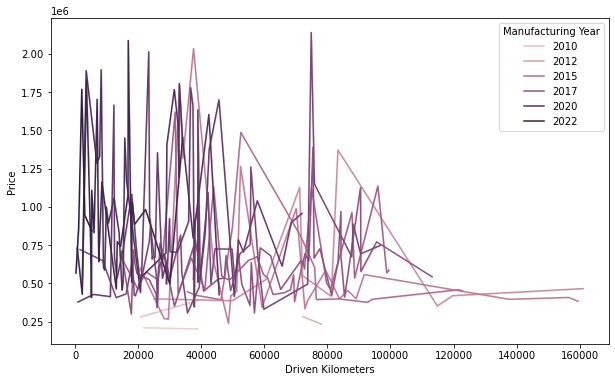

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Driven Kilometers', y='Price', data= df, hue= 'Manufacturing Year')
plt.show()

We can observe that as the car gets older the Price decreases. Also the Price also depends on Brand and other features also, that is the reason we can see both high and low even for newer cars.

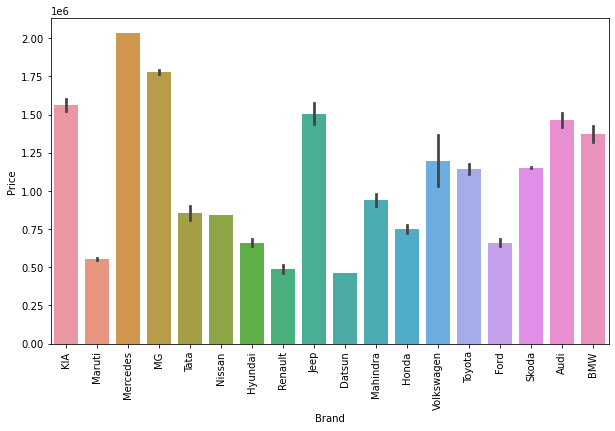

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Price', data=df)
plt.xticks(rotation= 90)
plt.show()

We can observe that Mercedes , MG are comparatively expensive Brands in car, while Datsun , Maruti are cheaper than rest.

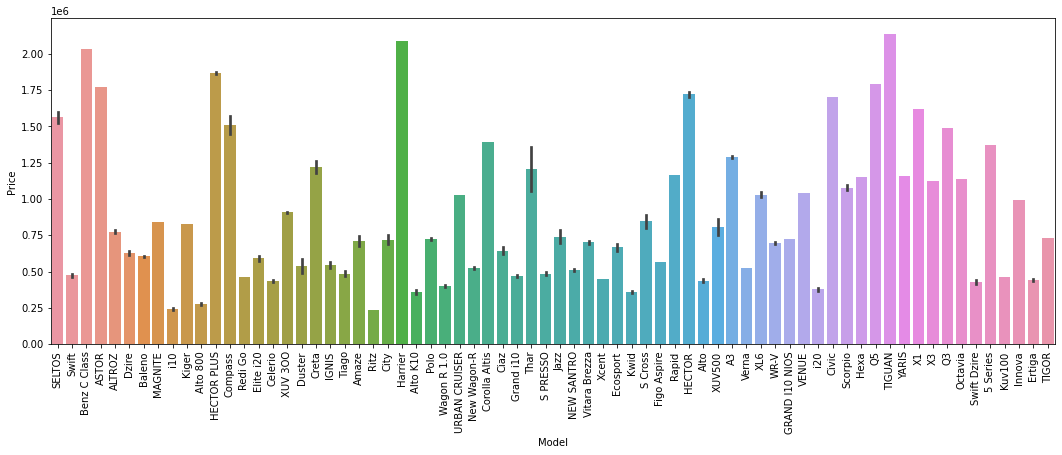

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x='Model', y='Price', data=df)
plt.xticks(rotation= 90)
plt.show()

We can observe that Tiguan, Harrier are the expensive cars followed by Benz C class, while Ritz, i10 , auto 800 are compact under lower budget vehicles.

<AxesSubplot:xlabel='Brand', ylabel='Price'>

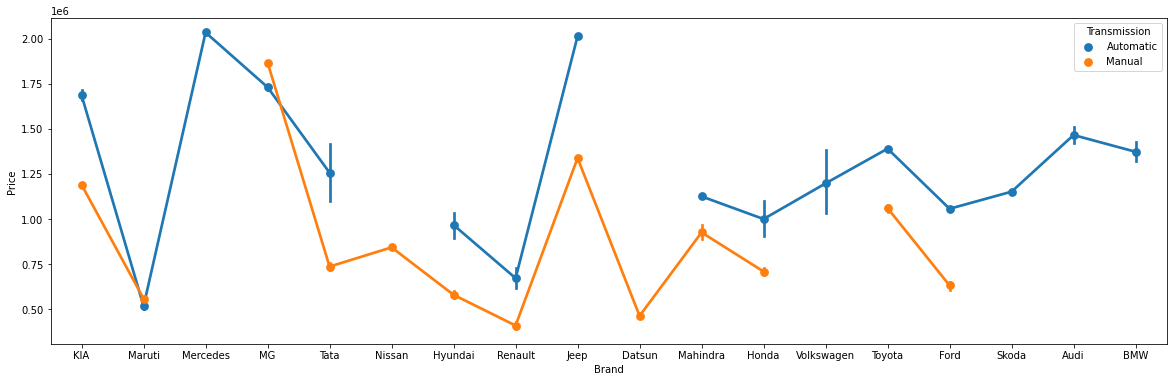

In [32]:
plt.figure(figsize=(20,6))
sns.pointplot(x='Brand', y='Price', hue='Transmission', data=df)

We can observe that automatic vehicles are comparatively expensive then manual transmission.

<function matplotlib.pyplot.show(close=None, block=None)>

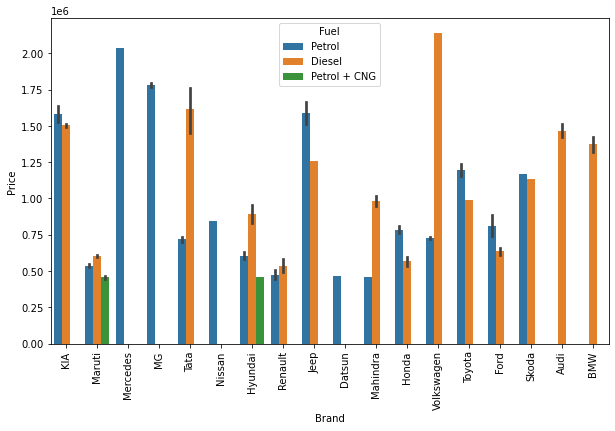

In [33]:
plt.figure(figsize=(10,6))
sns.barplot('Brand', 'Price', hue= 'Fuel', data= df)
plt.xticks(rotation= 90)
plt.show

Maruti and Hyundai are the Brands which has all three types of fuel engine. Audi and BMW has Diesel cars only while Mercedes, MG, Nissan, Datsun Brands has Petrol cars only in our dataset.

The Price point od diesel or petrol cars mostly depends on brand.

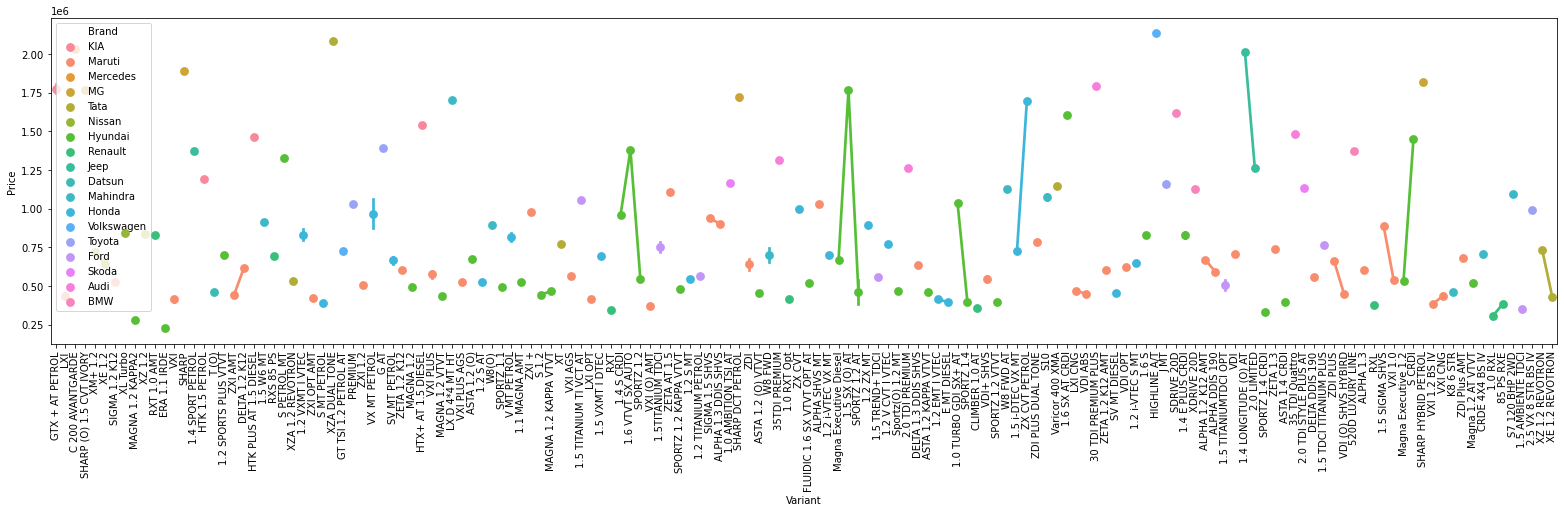

In [34]:
plt.figure(figsize=(27, 6))
sns.pointplot('Variant', 'Price', hue= 'Brand', data=df)
plt.xticks(rotation=90)
plt.show()

from here we can observe that variant plays an important role in determining the price of car.Brands themselve consist of certain variant in cars which are expensive.

<Figure size 1296x432 with 0 Axes>

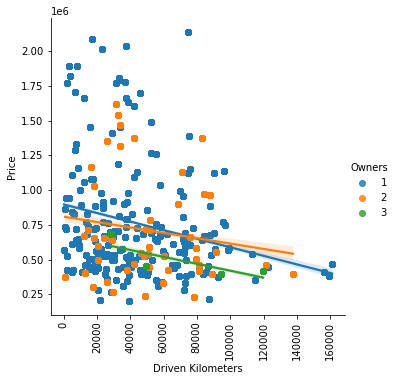

In [35]:
plt.figure(figsize=(18,6))
sns.lmplot(data=df, x='Driven Kilometers', y= 'Price', hue= 'Owners', fit_reg= True)
plt.xticks(rotation=90)
plt.show()

We can observe that the Price point for 3rd owner is always low. Less driven single owner cars get good sales Price.

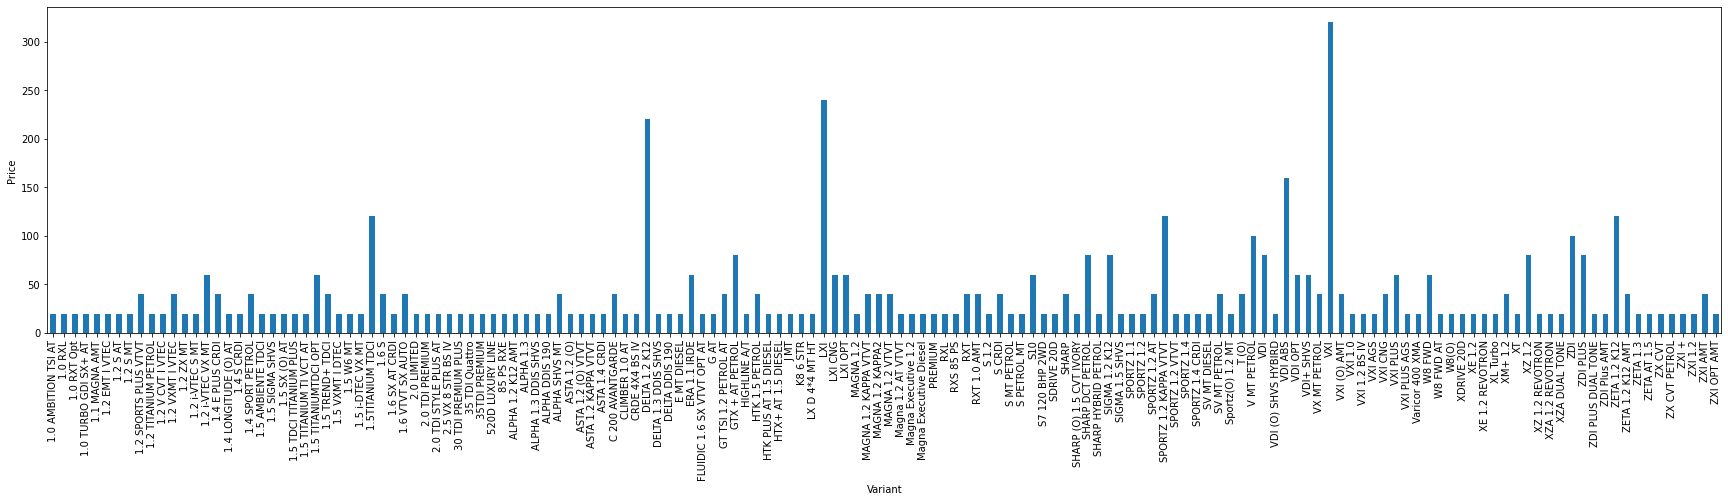

In [36]:
plt.figure(figsize=(30,6))
df.groupby('Variant').Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.show()

VXI models are higher in sales data.

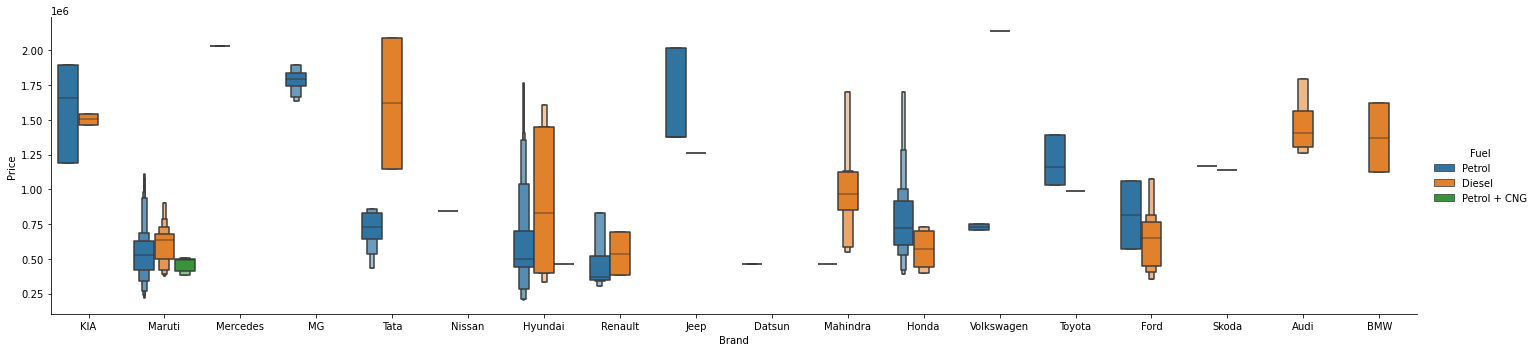

In [37]:
sns.catplot(x='Brand', y='Price', data=df, hue='Fuel', kind='boxen', height=5, aspect=4)

Mercedes and Volkswagen cars has higher means for Price.

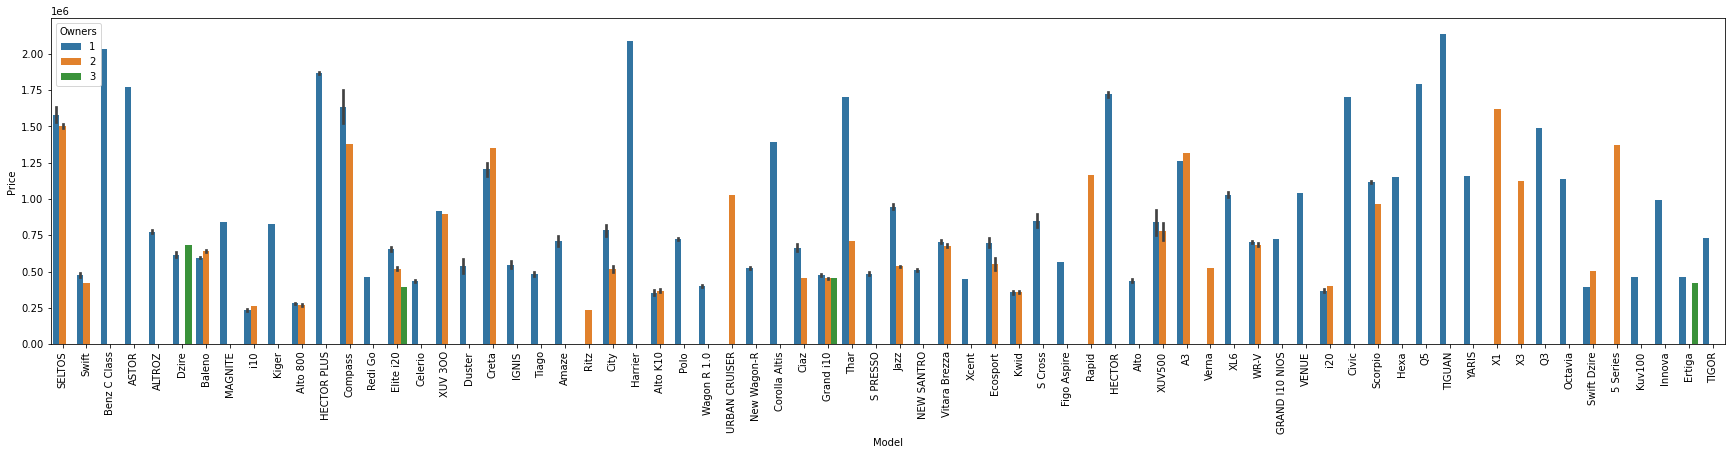

In [38]:
plt.figure(figsize=(30,6))
sns.barplot(x='Model',y='Price',data=df,hue='Owners')
plt.xticks(rotation=90)
plt.show()

We can observe that compact cars like Dzire, Elite i20, Grand i10, Ertiga offen have 3rd owner. As these normally used for cab purpose or purchased by new driver, in order to learn driving.

In [39]:
# Statistical analysis of the Dataset
df.describe()

,Manufacturing Year,Driven Kilometers,Owners,Price
count,5660.000000,5660.000000,5660.000000,5.660000e+03
mean,2017.431095,43490.685512,1.208481,7.548812e+05
std,2.603168,30719.562442,0.439681,4.209806e+05
min,2009.000000,244.000000,1.000000,2.020990e+05
25%,2016.000000,19930.000000,1.000000,4.587990e+05
50%,2018.000000,37413.000000,1.000000,6.398990e+05
75%,2019.000000,65162.000000,1.000000,8.978990e+05
max,2022.000000,161137.000000,3.000000,2.139099e+06


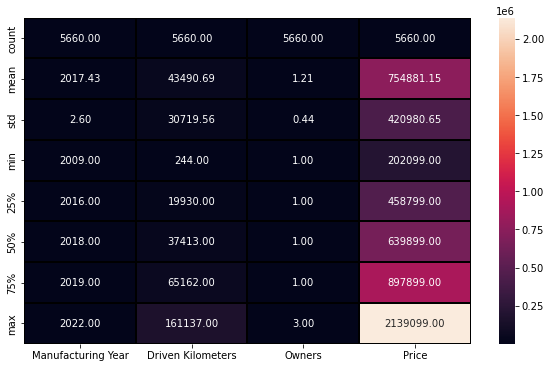

In [40]:
# let's visualize it using Heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.describe(), annot= True,linewidths=0.1,linecolor='black', fmt='.2f')
plt.show()

From above observation we can say that, the mean price of a car is around 7.5Lakh, and mean year of manufacturing is 2017 and driven kilometers is about 43490.
The highest price for car in the dataset is 2139099.

As of now the datset looks good. Let's go ahead and visualize the correlation matrix, before encoding categorical columns.


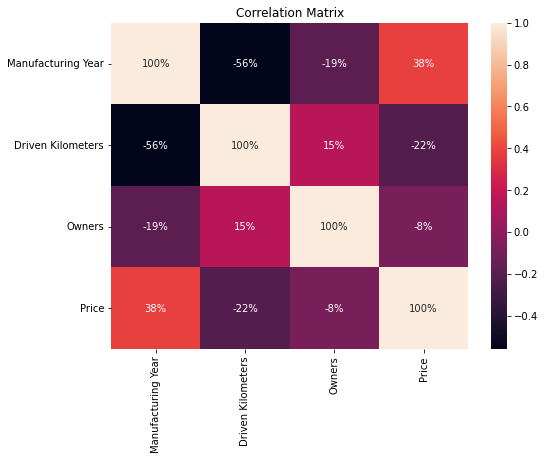

In [41]:
# let's visualize correlation matrix by using Heatmap.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

We can observe that Manufacturing Year is highest correlated feature so far. and Owners is lesser correlation comparatively.

Both Driven kilometers and Owners are negatively correlated to Price, which we observe early also. Negative correlation means if the value of One Increases the value of other variable decreases.
Here in our case as owner or driven kilometer increases, there is sure depreciation of Car Price.

Let's Encode our categorical columns.


# Encoding

In [23]:
df.dtypes

Brand                 object
Model                 object
Variant               object
Transmission          object
Manufacturing Year     int64
Driven Kilometers      int32
Owners                 int64
Fuel                  object
Price                  int32
dtype: object

We can observe that 'Brand', 'Model', 'Variant','Transmission', 'Fuel' are our categorical columns. And to encode them we can use label encoder as they have Nominal data.

In [24]:
# Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

#Transform
df['Brand']= lab_enc.fit_transform(df['Brand'])
df['Model']= lab_enc.fit_transform(df['Model'])
df['Variant']= lab_enc.fit_transform(df['Variant'])
df['Transmission']= lab_enc.fit_transform(df['Transmission'])
df['Fuel']= lab_enc.fit_transform(df['Fuel'])

In [25]:
df.head()   # checking our dataset

,Brand,Model,Variant,Transmission,Manufacturing Year,Driven Kilometers,Owners,Fuel,Price
0,7,47,62,0,2020,8241,1,1,1895199
1,10,49,70,1,2019,27659,1,1,533399
2,11,9,51,0,2014,37531,1,1,2033499
3,8,3,93,0,2022,2091,1,1,1767999
4,15,2,132,1,2021,7416,1,1,720176


We can observe that all our data's are properly encoded, we are not left with any Object column. It's safe to proceed further in ML model Building. However, before that, let's check for correlation one more time.

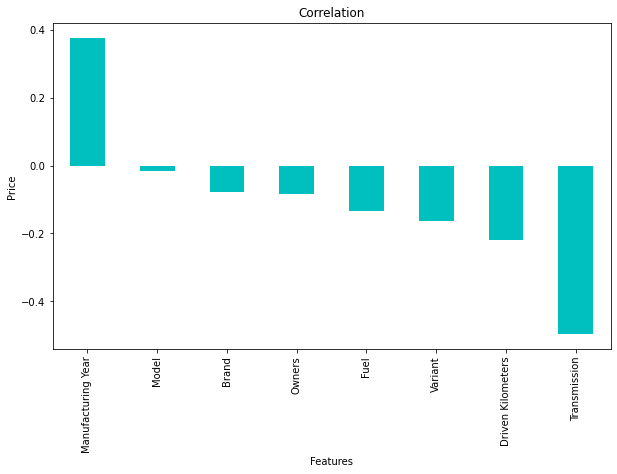

In [45]:
# correlation with target variable
plt.figure(figsize=(10,6))
df.corr()['Price'].sort_values(ascending= False).drop(['Price']).plot(kind= 'bar', color='c')
plt.xlabel("Features")
plt.ylabel("Price")
plt.title("Correlation")
plt.show()

From here We can observe that most of the features are negatively correlated with our target varibale i.e Price. Manufacturing Year shows strong correlation with Price.
Model alone don't show strong correlation with Price, but we can see that Brand, Variant is comparatively stronger features.

Let's plot correlation matrix one more time for entire dataset. This will also helps us to observe decree of correlation between our independent Features.  

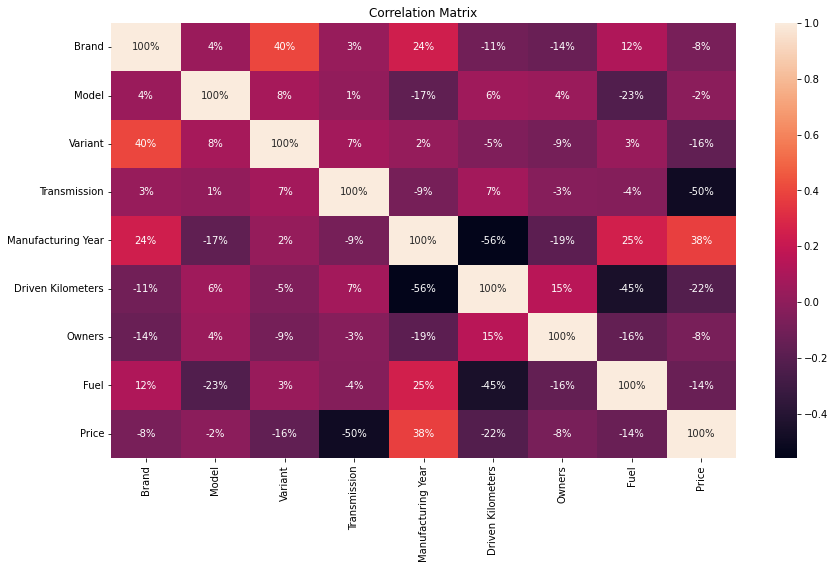

In [46]:
# Plotting correlation matrix using heat map
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

From above observation it is clear that or dataset don't have multicollinearity. As the independent variables i.e. the feature columns are not correlated with one another.

We also observe that Transmission shows strong correlation with Price. While Model shows least correaltion with Price which is similar to what we observe in the previous plot.

# Skewness and Outliers

In [47]:
df.skew()

Brand                 0.062091
Model                 0.395864
Variant              -0.233537
Transmission         -1.409531
Manufacturing Year   -0.647837
Driven Kilometers     0.995041
Owners                1.922652
Fuel                 -0.346383
Price                 1.403594
dtype: float64

Taking threshold of +/-1, We don't observe any strong skewness in our dataset. And those columns which shows skewness are categorical columns or label and on both the cases we don't treat skewness in them.

Let's visualise Outlier using Boxplot.

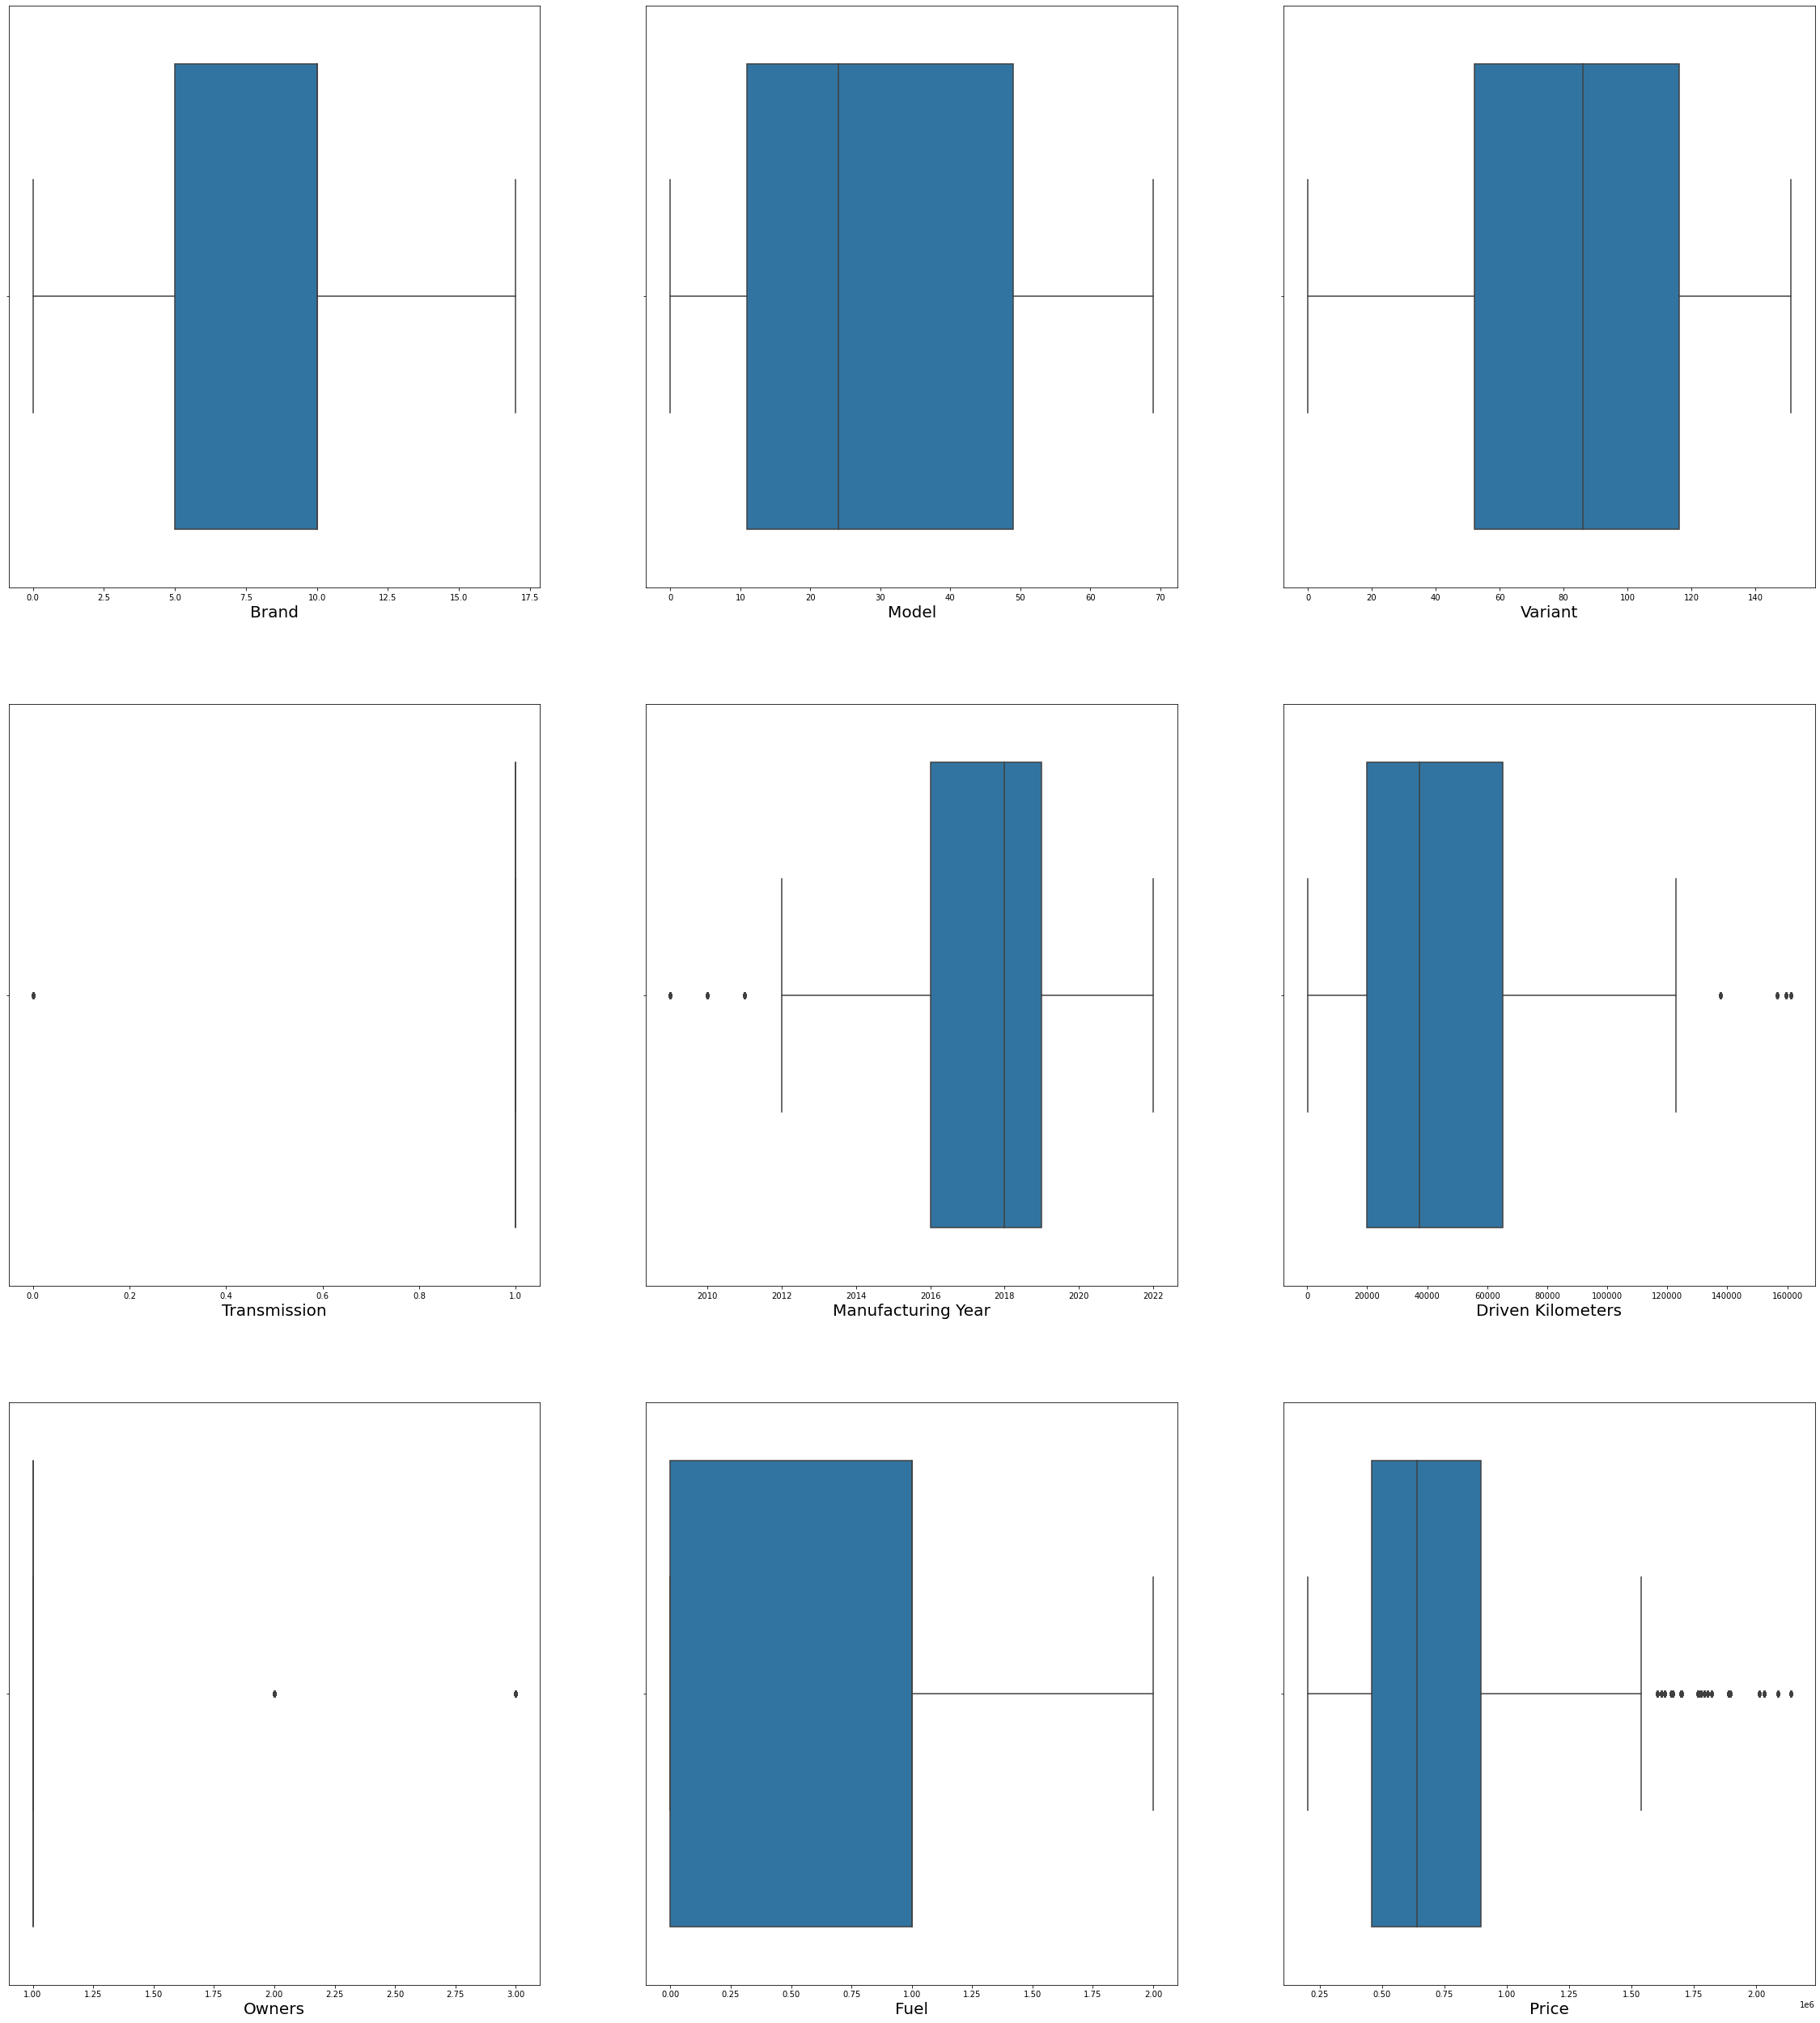

In [48]:
plt.figure(figsize=(40,45))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize= 20)
        
    plotnumber+=1
plt.show()

We can see couple outliers in Price, but is our Label column so we don't distrub that, rest dataset looks good.

We are safe to proceed further, with scaling and then finally building the ML model.

# Scaling

we will use standard scalar in order to scale our data, one thing to note here that, we only scale features not label. So we need to separate, Features and Label.

In [26]:
# Let's separate features and label
X= df.drop('Price', axis=1)                # feature dataset
y= df.Price                                # label dataset

In [27]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

X_scaled=scalar.fit_transform(X)

print(X_scaled.shape)
print(y.shape)

(5660, 8)
(5660,)


In [51]:
X.isnull().sum()               # chceking for null one last type.

Brand                 0
Model                 0
Variant               0
Transmission          0
Manufacturing Year    0
Driven Kilometers     0
Owners                0
Fuel                  0
dtype: int64

Our dataset looks decent and is scaled now, let's go ahead with ML Model Building


# Model Building

Before starts with model Building, we need to split the dataset into train dataset and test dataset.

In [28]:
# importing necessary library
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
X_train,X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=.20, random_state=42)

As we split our dataset into train and test set, (20% data for test) we can go ahead with different Models. As Price is our label, we know that it will be a regression model.

So let's get started with Linear Regression


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

# ML Model
LR= LinearRegression()

#fit
LR.fit(X_train,y_train)

#predict
y_pred= LR.predict(X_test)
pred=LR.predict(X_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(y_train, pred), 2)
LR_train_avg_MAE= LR_train_MAE/(max(y)-min(y))
LR_train_R2 = round(r2_score(y_train, pred), 4)
LR_train_RMSE=(np.sqrt(mean_squared_error(y_train, pred))/(max(y)-min(y)))         

print(f" R^2 Score : {LR_train_R2}\n")
print(f" MAE score avg : {LR_train_avg_MAE}\n")
print(f" RMSE score avg : {LR_train_RMSE}\n")
                    

#score variables
LR_R2= round(r2_score(y_test, y_pred), 4);
LR_MAE=(mean_absolute_error(y_test, y_pred)/(max(y)-min(y)))
LR_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))  
                  

print("---------------Test Score-------------")
print(f" R^2 Score : {LR_R2}\n")
print(f" MAE score avg : {LR_MAE}\n")
print(f" RMSE score avg : {LR_RMSE}\n")

--------- Train score---------
 R^2 Score : 0.4638

 MAE score avg : 0.11612123902942695

 RMSE score avg : 0.16132774138886954

---------------Test Score-------------
 R^2 Score : 0.4357

 MAE score avg : 0.11186514389644407

 RMSE score avg : 0.15385505780075992



In [55]:
# cross validation
from sklearn.model_selection import cross_val_score
LR= LinearRegression()
scores= cross_val_score(LR, X_train, y_train, scoring='r2', cv=10)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.4581797936768311


Looking at the scores here, I am not sure if this is our model.


# Ensemble Technique

In [56]:
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
#Model
RFR=RandomForestRegressor()

#fit 
RFR.fit(X_train,y_train)

#predict
y_pred= RFR.predict(X_test)
pred=RFR.predict(X_train)

print("--------- Train score---------")
RFR_train_R2= round(r2_score(y_train, pred), 4)
RFR_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
RFR_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {RFR_train_R2}\n")
print(f" MAE avg score : {RFR_train_MAE}\n")
print(f" RMSE avg score : {RFR_train_RMSE}\n")

#score variables
RFR_R2= round(r2_score(y_test, y_pred), 4)
RFR_MAE=(mean_absolute_error(y_test,y_pred))/(max(y)-min(y))
RFR_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {RFR_R2}\n")
print(f" MAE avg score : {RFR_MAE}\n")
print(f" RMSE avg score : {RFR_RMSE}\n")


--------- Train score---------
 R^2 Score : 1.0

 MAE avg score : 0.0

 RMSE avg score : 0.0

---------------Test Score-------------
 R^2 Score : 1.0

 MAE avg score : 0.0

 RMSE avg score : 0.0



In [57]:
# cross validation
RFR= RandomForestRegressor()
scores= cross_val_score(RFR, X_train, y_train, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  1.0


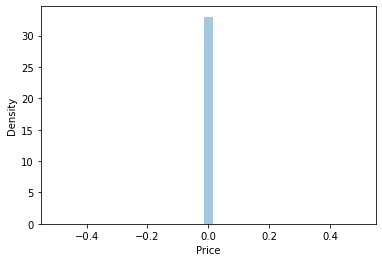

In [58]:
# Visualization of scores
sns.distplot(y_test-y_pred)
plt.show()

<AxesSubplot:xlabel='Price'>

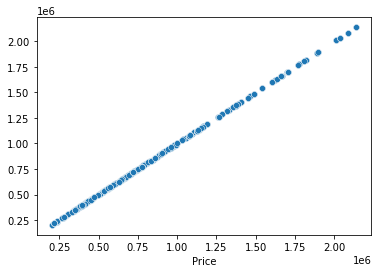

In [59]:
sns.scatterplot(y_test,y_pred)

In [67]:
# we are performing hyper parameter tuning in order to chcek is over model overfitting or not. 
# Hyper Parameter Tunning
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': range(100,1200,100),
               'max_features':['auto', 'sqrt'] ,
               'max_depth': range(5,30,5),
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf':[1, 2, 5, 10] }

#grid_search=GridSearchCV(estimator=RFR, param_grid= random_grid, cv=5)

#grid_search.fit(X_train,y_train)

#grid_search.best_estimator_

rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= random_grid)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_

RandomForestRegressor(max_depth=25, max_features='auto', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=300)

In [68]:
#prediction= grid_search.best_estimator_.predict(X_test) 

prediction=rnd_srch.best_estimator_.predict(X_test)
print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE score : {MAE}\n")
print(f" RMSE score : {RMSE}\n")




Post tuning scores
---------------Test Score-------------
 R^2 Score : 1.0

 MAE avg score : 398.5076471118441

 RMSE avg score : 931.1578852281531



It is interesting to see that RandomForest Works amazingly well with our dataset. It gives almost perfect scores for all our metrics, even cross validation score is on point. There is no doubt that it is our final model.

As all the scores are perfect, their is no scope for Hyper parameter tuning here. But still we did, and through hyper parameter tuning, we are still obtaining r2_score of 1 and both mean absolute error and RMSE scores as 0.

Let's work on some more Algorithm, before saving this model.



# Lasso

In [69]:
from sklearn.linear_model import Lasso

#model
LS=Lasso()
#fit 
LS.fit(X_train,y_train)

#predict
y_pred= LS.predict(X_test)
pred=LS.predict(X_train)

print("--------- Train score---------")
LS_train_R2= round(r2_score(y_train, pred), 4)
LS_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
LS_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {LS_train_R2}\n")
print(f" MAE avg score : {LS_train_MAE}\n")
print(f" RMSE avg score : {LS_train_RMSE}\n")


#score variables
LS_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
LS_R2= round(r2_score(y_test, y_pred), 4)
LS_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {LS_R2}\n")
print(f" Mean Absolute Error avg : {LS_MAE}\n")
print(f" Root Mean Squared Error avg: {LS_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.4638

 MAE avg score : 0.11612108865403853

 RMSE avg score : 0.16132774140374892


-------------Test Score---------------

 R^2 Score : 0.4357

 Mean Absolute Error avg : 0.11186489554534768

 Root Mean Squared Error avg: 0.15385485058941437



In [70]:
# cross validation
LS= Lasso()
scores= cross_val_score(LS, X_train, y_train, scoring='r2', cv=10)
LS_CS=scores.mean()
print("Cross validation score is : ", LS_CS)

Cross validation score is :  0.45817985092121793


In [71]:
# Hyper parameter tuning

param_grid= {'selection' : ['cyclic', 'random'],
             'max_iter': range(500,1200,100),
             'alpha': [0.01, 0.1, 0.5, 1.0],
             'random_state': range(0,100, 5)}


rnd_srch=RandomizedSearchCV(Lasso(), cv=5, param_distributions= param_grid)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_


Lasso(max_iter=900, random_state=80, selection='random')

In [72]:
rnd_pred= rnd_srch.best_estimator_.predict(X_test)   # predicting with best para meters
print("Accuracy post tuning \n")
print(r2_score(y_test, rnd_pred))
print("\nPost tuning MAE\n")
print(mean_absolute_error(y_test,rnd_pred)/(max(y)-min(y)))

Accuracy post tuning 

0.43570129038388783

Post tuning MAE

0.11186489554202898


We can observe that Linear model is not working well with our Dataset, while the ensemble technique works amazingly well. Let's do another ensemble boosting model before finalizing.


# AdaBoost Regressor

In [30]:
from sklearn.ensemble import AdaBoostRegressor

#  Model
ADA= AdaBoostRegressor()

#fit 
ADA.fit(X_train,y_train)

#predict 
y_pred=ADA.predict(X_test)
pred=ADA.predict(X_train)

print("--------- Train score---------")
ADA_train_R2= round(r2_score(y_train, pred), 4)
ADA_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
ADA_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {ADA_train_R2}\n")
print(f" MAE avg score : {ADA_train_MAE}\n")
print(f" RMSE avg score : {ADA_train_RMSE}\n")


#score variables
ADA_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
ADA_R2= round(r2_score(y_test, y_pred), 4)
ADA_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {ADA_R2}\n")
print(f" Mean Absolute Error avg : {ADA_MAE}\n")
print(f" Root Mean Squared Error avg: {ADA_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.7691

 MAE avg score : 0.08779128296630595

 RMSE avg score : 0.10585837562205355


-------------Test Score---------------

 R^2 Score : 0.7542

 Mean Absolute Error avg : 0.08523984327788665

 Root Mean Squared Error avg: 0.10154305929631338



In [32]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(ADA, X_train, y_train, scoring='r2', cv=10)
ADA_CS=scores.mean()
print("Cross validation score is : ", ADA_CS)

Cross validation score is :  0.7563253579618173


In [35]:
# Hyper parameter Tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV
ADA= AdaBoostRegressor()

parameter= {'n_estimators' : range(10,100,5),
            'learning_rate' : [0.1, 0.5, 1.0, 0.01],
            'loss' : ['linear', 'square', 'exponential'],
            'random_state' : range(2,100, 10)
           }

#grid_search=GridSearchCV(estimator=ADA, param_grid= parameter, cv=5)

#grid_search.fit(X_train,y_train)

#grid_search.best_estimator_        


rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions= parameter)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_


AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=85,
                  random_state=92)

In [36]:
#GCV_pred= grid_search.best_estimator_.predict(X_test) 
rnd_pred= rnd_srch.best_estimator_.predict(X_test)   # predicting with best para meters
print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, rnd_pred), 4)
MAE=(mean_absolute_error(y_test,rnd_pred))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,rnd_pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")


Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.7713

 MAE avg score : 0.07928506010503289

 RMSE avg score : 0.09795096412920704



We can observe that it gives us good score, but not as good as RandomForest Regressor, Ler's perform one more Advanced Boosting Model in order to determine our final model.



# XGBOOST REGRESSOR

In [81]:
import xgboost as XGB
#model
XGB = XGB.XGBRegressor()

#fit
XGB.fit(X_train,y_train)

#predict 
y_pred=XGB.predict(X_test)
pred=XGB.predict(X_train)

print("--------- Train score---------")
XGB_train_R2= round(r2_score(y_train, pred), 4)
XGB_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
XGB_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {XGB_train_R2}\n")
print(f" MAE avg score : {XGB_train_MAE}\n")
print(f" RMSE avg score : {XGB_train_RMSE}\n")


#score variables
XGB_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))
XGB_R2= round(r2_score(y_test, y_pred), 4)
XGB_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {XGB_R2}\n")
print(f" Mean Absolute Error avg : {XGB_MAE}\n")
print(f" Root Mean Squared Error avg: {XGB_RMSE}\n")


--------- Train score---------
 R^2 Score : 1.0

 MAE avg score : 8.904000473848489e-05

 RMSE avg score : 0.00012911813878215954


-------------Test Score---------------

 R^2 Score : 1.0

 Mean Absolute Error avg : 9.599744536832484e-05

 Root Mean Squared Error avg: 0.00014409674638118098



In [82]:
# Cross Validation
scores= cross_val_score(XGB, X_train, y_train, scoring='r2', cv=10)
XGB_CS=scores.mean()
print("Cross validation score is : ", XGB_CS)

Cross validation score is :  0.9999995495818652


In [83]:
# Hyper parameter Tuning

parameter= {'gamma':range(0,10,2),
           'max_depth': range(4,14,2),
           'feature_selector': ['cyclic','shuffle','random','greedy']}

grid_search=GridSearchCV(estimator=XGB, param_grid= parameter, cv=5)

grid_search.fit(X_train,y_train)

grid_search.best_estimator_


[19:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[19:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_selector='cyclic', gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=12, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [84]:
prediction= grid_search.best_estimator_.predict(X_test) 

print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")



Post tuning scores
---------------Test Score-------------
 R^2 Score : 1.0

 MAE avg score : 3.0335253506661246e-08

 RMSE avg score : 3.65144177852682e-08



In [85]:
# Training data score after hyper parameter tuning
train_pred=grid_search.best_estimator_.predict(X_train)
print("Post Tuning score for train data")
r2_score(y_train,train_pred)

Post Tuning score for train data


0.9999999999999726

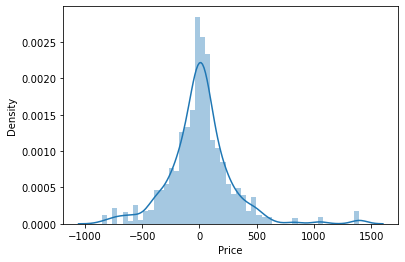

In [88]:
# Visualization of XGBoost score
sns.distplot(y_test-y_pred)
plt.show()

<AxesSubplot:xlabel='Price'>

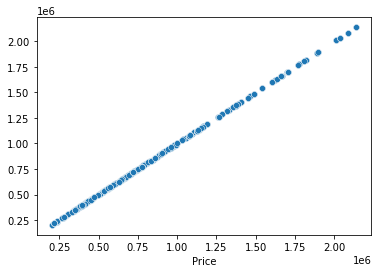

In [89]:
sns.scatterplot(y_test,prediction)

We can Observe that XGBOOST Regressor model , works equally well. Whatever error we are getting is also very low, After hyper parameter tuning, those error values decreases further almost tend to zero.

Also from the graph we plot, we can clearly see that there is minor deviation from true_y and predicted_y. which is not present in randomforrest


# Ridge

In [95]:
from sklearn.linear_model import Ridge
RG=Ridge()
#fit
RG.fit(X_train,y_train)

#predict 
y_pred=RG.predict(X_test)
pred=RG.predict(X_train)

print("--------- Train score---------")
Rid_train_R2= round(r2_score(y_train, pred), 4)
Rid_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
Rid_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {Rid_train_R2}\n")
print(f" MAE avg score : {Rid_train_MAE}\n")
print(f" RMSE avg score : {Rid_train_RMSE}\n")


#score variables
Rid_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))
Rid_R2= round(r2_score(y_test, y_pred), 4)
Rid_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {Rid_R2}\n")
print(f" Mean Absolute Error avg : {Rid_MAE}\n")
print(f" Root Mean Squared Error avg: {Rid_RMSE}\n")




--------- Train score---------
 R^2 Score : 0.4638

 MAE avg score : 0.11612177543533996

 RMSE avg score : 0.16132781765704865


-------------Test Score---------------

 R^2 Score : 0.4359

 Mean Absolute Error avg : 0.11185680710409002

 Root Mean Squared Error avg: 0.15383394780599885



In [97]:
# Cross Validation
scores= cross_val_score(RG, X_train, y_train, scoring='r2', cv=10)
Rid_CS=scores.mean()
print("Cross validation score is : ", Rid_CS)

Cross validation score is :  0.4581878856037031


In [96]:
# Hyper parameter tuning for Ridge Regressor

from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(X_train,y_train)
print(ridgecv.best_params_)

print(ridgecv.best_score_)


{'alpha': 2}
-98330805174.4583


In [98]:
pred= ridgecv.best_estimator_.predict(X_test) 

print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, pred), 4)
MAE=(mean_absolute_error(y_test,pred))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")



Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.436

 MAE avg score : 0.11184849274847534

 RMSE avg score : 0.15381304493940187



We can observe that linear model does not gives good scores with our dataset, while ensemble models works better with our dataset. 

Now, let's summarize all the models. Before saving the best one.



# Summarizing

In [99]:
# summarizing each Model

MAE=[LR_MAE,RFR_MAE,LS_MAE,XGB_MAE,ADA_MAE, Rid_MAE]
R2= [LR_R2,RFR_R2,LS_R2,XGB_R2,ADA_R2, Rid_R2]
RMSE=[LR_RMSE,RFR_RMSE,LS_RMSE,XGB_RMSE,ADA_RMSE, Rid_RMSE]
Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,ADA_CS, Rid_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'Lasso Regressor', 'XGBoost Regressor', 'AdaBoost Regressor', 'Ridge Regressor'],
    'MAE': MAE, 'R^2' :R2,'RMSE': RMSE, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='R^2', ascending = False )


,Models,MAE,R^2,RMSE,Cross Validation Score
1,Random Forest Regressor,0.000000,1.0000,0.000000,1.000000
3,XGBoost Regressor,0.000096,1.0000,0.000144,1.000000
4,AdaBoost Regressor,0.086651,0.7382,0.104803,0.758917
5,Ridge Regressor,0.111857,0.4359,0.153834,0.458188
0,Linear Regression,0.111865,0.4357,0.153855,0.458180
2,Lasso Regressor,0.111865,0.4357,0.153855,0.458180


Conclusion :

From here we can conclude that RandomForest Regressor is our final model. As it has highest r2_score as well as zero mean absolute error and root mean squared error.

We did plot the graph to see how our model is performing, And indeed it is performing really well. We did not perform hyper parameter tuning for random forest as we already get best score. And there is no score to improve it further.


# Saving Best Model

In [91]:
# Saving Best Performing Model
import joblib
joblib.dump(RFR, 'Used_Car_Price_Prediction_Project.pkl')

['Used_Car_Price_Prediction_Project.pkl']